### Using Neural Network to approximate functions compared to traditional supervised learning approaches

Inspiration drawn from https://nbviewer.org/url/people.math.ethz.ch/~jteichma/lecture_ml_web/Function%20approximation%20by%20linear%20model%20and%20deep%20network.ipynb


In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from sklearn import linear_model
from sklearn.model_selection import train_test_split


/home/jbohn/miniconda3/envs/research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jbohn/miniconda3/envs/research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jbohn/miniconda3/envs/research/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jbohn/miniconda3/envs/research/lib

In [2]:
# Definition of the function with exponential and sinusoidal terms
def func_trans(x):
    result = x**2*np.sin(3*x)
    return (result)

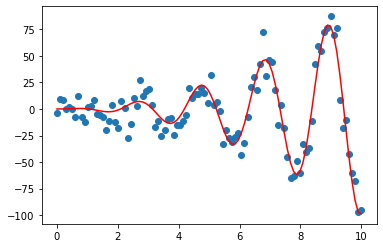

In [3]:
x_smooth = np.array(np.linspace(0,10,100))
y_smooth = func_trans(x_smooth)
noise=np.random.normal(loc=0,scale=10,size=100)
y_obs=y_smooth+noise
plt.scatter(x_smooth,y_obs)
plt.plot(x_smooth,y_smooth,color='red')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_smooth, y_smooth, test_size=0.33)
X_train=X_train.reshape(len(X_train),1)
X_test=X_test.reshape(len(X_test),1)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)



Supervised Learning Approach using Least Squares Polynomial And Trig fitting

In [5]:
M = x_smooth[:, np.newaxis]**[0,1,2,1]
M[:,3]=np.sin(M[:,3])



In [6]:
p, res, rnk, s = lstsq(M, y_obs)
print("LS Solution is", p)
print("Sum of Squared Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [-12.17318047   5.92871111  -0.62514577   6.89958918]
Sum of Squared Residuals is 115826.05
Rank of LS matrix is 4
Singular Values are [454.13151345  15.51479942   6.88838049   2.76475549]


In [7]:
reg = linear_model.Lasso(alpha=1)
model=reg.fit(M,y_obs)
weights=model.coef_
weights

array([ 0.        ,  2.47115663, -0.29783516,  3.05401975])

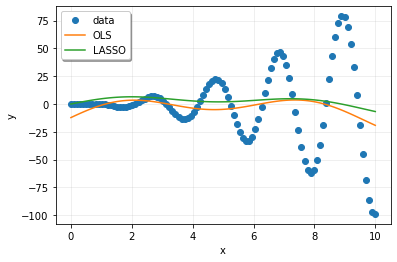

In [8]:
plt.plot(x_smooth, y_smooth, 'o', label='data')
xx = np.linspace(0, 10, 100)
yy = p[0] +p[1]*xx+p[2]*xx**2+p[3]*np.sin(xx)
zz=weights[0] +weights[1]*xx+weights[2]*xx**2+weights[3]*np.sin(xx)
plt.plot(xx, yy, label='OLS')
plt.plot(xx,zz,label='LASSO')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

Neural Network Implementation 

In [9]:
n_input = 1
n_output = 1  # Regression output is a number only

n_hidden_layer = 25 # number of neurons in the hidden layer

In [10]:
# weights and bias vectors stored in dict keyed by layer
# explicitly create multiple layers here 
weights = {
    'hidden_layer1': tf.Variable(tf.random.normal([n_input, n_hidden_layer])),
    'hidden_layer2': tf.Variable(tf.random.normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random.normal([n_hidden_layer, n_output]))
}
biases = {
    'hidden_layer1': tf.Variable(tf.random.normal([n_hidden_layer])),
     'hidden_layer2': tf.Variable(tf.random.normal([n_hidden_layer])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

Note there are 25 bias terms in the hidden layer as there is a bias for each neuron

In [11]:
print("Shape of the weights tensor of hidden layer 1:",weights['hidden_layer1'].shape)
print("Shape of the weights tensor of output layer:",weights['out'].shape)
print("--------------------------------------------------------")
print("Shape of the bias tensor of hidden layer 1:",biases['hidden_layer1'].shape)
print("Shape of the bias tensor of output layer:",biases['out'].shape)

Shape of the weights tensor of hidden layer 1: (1, 25)
Shape of the weights tensor of output layer: (25, 1)
--------------------------------------------------------
Shape of the bias tensor of hidden layer 1: (25,)
Shape of the bias tensor of output layer: (1,)


Below we intialize our weights and biases to random values 
   - Different Distributions one can select to configure init
   - Identical weight values will prevent learning due to gradient 

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w1=sess.run(weights['hidden_layer1'])
    b1=sess.run(biases['hidden_layer1'])
    w2=sess.run(weights['hidden_layer2'])
    b2=sess.run(biases['hidden_layer2'])
print("Weight tensor initialized randomly\n---------------------------------------\n",w1,w2)
print("Bias tensor initialized randomly\n---------------------------------------\n",b1,b2)
sess.close()



Weight tensor initialized randomly
---------------------------------------
 [[-0.02212057  0.85248154 -1.4066347   0.5140706   0.5019432   0.45494163
   1.7371471   0.77492416  1.0242275   0.06507353 -0.2068789  -0.3185884
   0.9678943  -0.01996546  0.6096387  -0.6127352  -1.0740255   0.20947944
   1.3636447  -1.3816123   1.8433206  -0.97350544 -0.7695545   0.9568384
   0.1049851 ]] [[ 1.7161082  -0.07371872 -0.09889501 -0.66309553 -1.5447357  -1.435163
  -0.8385561   0.7309358   0.63002616 -1.5390137  -1.3169798  -1.6735861
   0.59314597 -1.0427539   1.4658487  -1.9611827  -1.4450876   0.06761137
  -0.44336262 -1.4312712  -0.54689914 -1.9191121   1.2020555  -1.3321178
  -0.15028617]]
Bias tensor initialized randomly
---------------------------------------
 [-0.8501927   0.59817713 -0.4611862   0.99321365  0.67564213 -0.68281746
 -1.2791367   0.8783532  -3.4041395   0.08197065  1.0861833   1.2450409
  1.7565668   0.6031527   1.1483613  -1.8984339   0.6947259   1.2673299
 -1.1486958  

Every Tensorflow model can be formatted as a directed graph that descibes the flow of information 

First let's set input values

In [13]:
# tf Graph input
x = tf.placeholder("float32", [None,n_input])
y = tf.placeholder("float32", [None,n_output])

Recall all nodes are connected to one another , so we apply the dot product of weights on our features and scale with bias before applying activation 

We then add a Relu activation layer

And finally an ouput layer

In [14]:
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer1']),biases['hidden_layer1'])
layer_1 = tf.nn.relu(layer_1)

layer_2 = tf.add(tf.matmul(x, weights['hidden_layer2']),biases['hidden_layer2'])
layer_2 = tf.nn.relu(layer_2)

# Output layer with linear activation
ops = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

In [15]:
cost = tf.reduce_mean(tf.squared_difference(ops,y)) # MSE
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) # gradient descent where loss function is MSE

In [16]:
training_epochs=10000
init = tf.global_variables_initializer()

# Empty lists for book-keeping purpose
epoch=0
log_epoch = []
epoch_count=[]
acc=[]
loss_epoch=[]

# Launch the graph and time the session
t1=time.time()
with tf.Session() as sess:
    sess.run(init)    
    # Loop over epochs
    for epoch in tqdm(range(training_epochs)):
        # Run optimization process (backprop) and cost function (to get loss value)
        _,l=sess.run([optimizer,cost], feed_dict={x:X_train, y: y_train})
        loss_epoch.append(l) # Save the loss for every epoch        
        epoch_count.append(epoch+1) #Save the epoch count
    w=sess.run(weights)
    b = sess.run(biases)
    yhat=sess.run(ops,feed_dict={x:X_test})
t2=time.time()

time_SNN = t2-t1

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1317.33it/s]


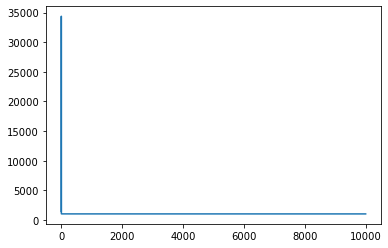

In [17]:
plt.plot(loss_epoch)

### Results

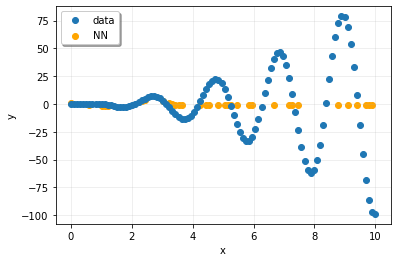

In [18]:
plt.plot(x_smooth, y_smooth, 'o', label='data')


plt.scatter(X_test, yhat, label='NN',color='orange')


plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()